Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mean Squared Error: 23.486735195426004
R-squared: 0.7390315860425418


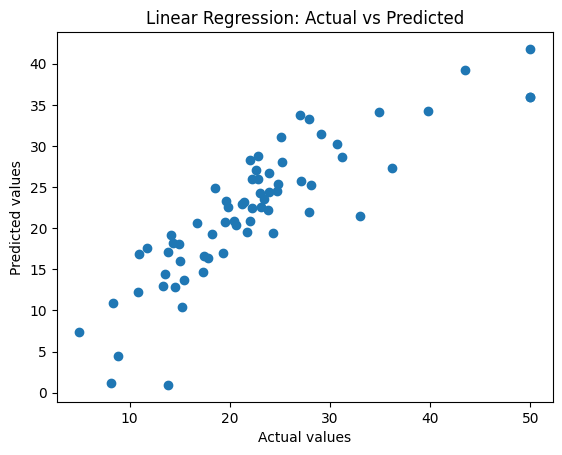

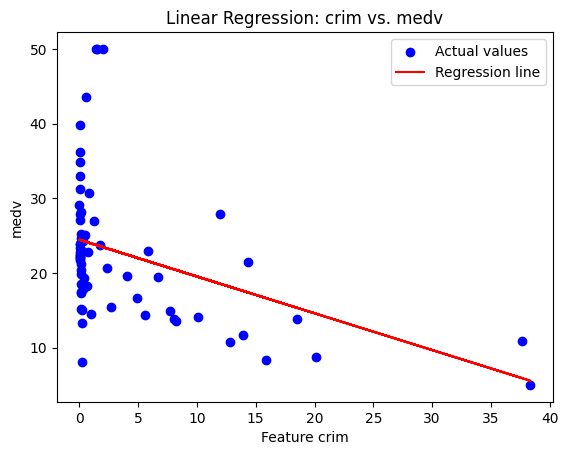

In [17]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from google.colab import drive

# Mounting Google Drive
drive.mount('/content/drive')

# Loading the dataset
df = pd.read_csv('drive/MyDrive/ML/train.csv')

# Dropping the 'ID' column if it exists
if 'ID' in df.columns:
    df = df.drop('ID', axis=1)

# Separating the features (X) and the target (y)
X = df.drop('medv', axis=1)  # Features
y = df['medv']  # Target

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the linear regression model
lr = linear_model.LinearRegression()

# Fitting the model on the training data
lr.fit(X_train, y_train)

# Predicting on the test data
y_pred = lr.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plotting the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

# Selecting a single feature (for example, the first feature column) for visualization
feature_index = 0  # You can change this to any feature index you'd like
X_train_single_feature = X_train.iloc[:, feature_index].values.reshape(-1, 1)
X_test_single_feature = X_test.iloc[:, feature_index].values.reshape(-1, 1)

# Create a new linear regression model for the single feature
lr_single_feature = linear_model.LinearRegression()

# Fit the model on the single feature
lr_single_feature.fit(X_train_single_feature, y_train)

# Predicting on the test data for the single feature
y_pred_single_feature = lr_single_feature.predict(X_test_single_feature)

# Plotting the single feature against the target with the regression line
plt.scatter(X_test_single_feature, y_test, color='blue', label='Actual values')
plt.plot(X_test_single_feature, y_pred_single_feature, color='red', label='Regression line')
plt.xlabel(f'Feature {X.columns[feature_index]}')
plt.ylabel('medv')
plt.title(f'Linear Regression: {X.columns[feature_index]} vs. medv')
plt.legend()
plt.show()
